# K-Nearest Neighbor classification (KNN)

### 0. MNIST data

In [104]:
import tensorflow as tf

data = tf.keras.datasets.mnist.load_data()

In [105]:
help(tf.keras.datasets.mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [106]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

60000 images in X_train

In [107]:
X_train[12345].min(), X_train[12345].max()

(0, 255)

These numbers represent the color values

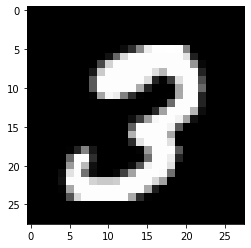

In [108]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(X_train[12345], cmap="gray")

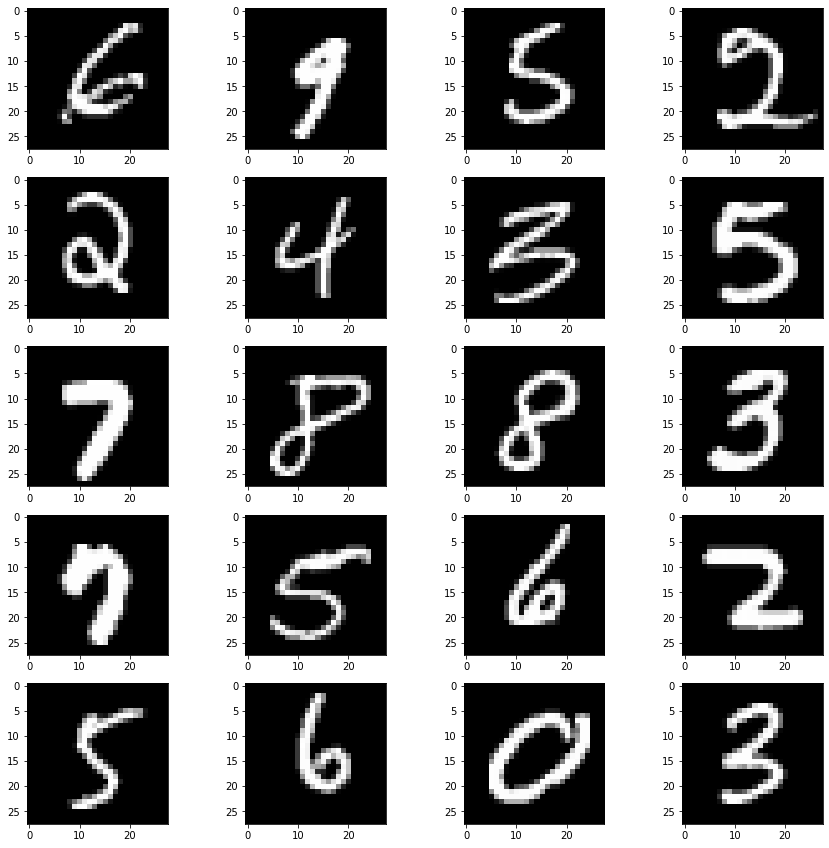

In [109]:
fig, ax = plt.subplots(5,4, figsize=(15,15))
for i in range(1, 21):
    plt.subplot(5,4, i)
    plt.imshow(X_train[np.random.randint(0, 50000)], cmap="gray")

In [110]:
X_test = X_test.reshape(10000,-1)
X_train = X_train.reshape(60000, -1)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### Train|test|validation split

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.16, random_state=42)

In [112]:
X_validation.shape, X_train.shape

((9600, 784), (50400, 784))

### 2. Hyperparameter tuning

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_list = []

for k in range(1, 20):
    model_KNN = KNeighborsClassifier(n_neighbors = k)
    model_KNN.fit(X_train, y_train)
    y_pred = model_KNN.predict(X_validation)
    accuracy = accuracy_score(y_pred, y_validation)
    accuracy_list.append(accuracy)

[0.9751041666666667,
 0.9639583333333334,
 0.9727083333333333,
 0.9715625,
 0.9721875,
 0.9703125,
 0.9701041666666667,
 0.9691666666666666,
 0.9690625,
 0.9671875,
 0.9666666666666667,
 0.9665625,
 0.9648958333333333,
 0.9641666666666666,
 0.9636458333333333,
 0.963125,
 0.9611458333333334,
 0.9614583333333333,
 0.9608333333333333]

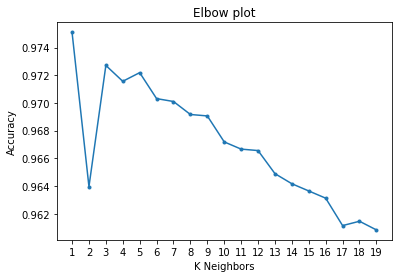

In [126]:
fig, ax = plt.figure(), plt.axes()
ax.plot(range(1, 20), accuracy_list, ".-")
plt.xticks(range(1,20))
ax.set(title = "Elbow plot", xlabel="K Neighbors", ylabel="Accuracy");

Chosing k = 1

### 3. Train and predict

In [155]:
# resetting training data
X_train = data[0][0]
X_train = X_train.reshape(60000, -1)
y_train = data[0][1]

model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

In [156]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



number 8 had the highest proportion of false negatives,

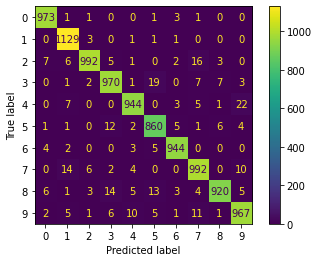

In [157]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [164]:
for i in range(10):
    print(f"True label: {i}, miscalculated: {sum(cm[i,:])-cm[i][i]}")

True label: 0, miscalculated: 7
True label: 1, miscalculated: 6
True label: 2, miscalculated: 40
True label: 3, miscalculated: 40
True label: 4, miscalculated: 38
True label: 5, miscalculated: 32
True label: 6, miscalculated: 14
True label: 7, miscalculated: 36
True label: 8, miscalculated: 54
True label: 9, miscalculated: 42


I think that 8 had the most miscalculations because it can easily look like a 6, 9, 3 or even 0.

In [228]:
from matplotlib import image

my_img = image.imread("test.jpg")
my_img = my_img[:,:,1].reshape(-1)
prediction = model_KNN.predict(my_img.reshape(1,-1))
print(prediction)

[2]
